<a href="https://colab.research.google.com/github/farhan0404/Data-Visualisation/blob/main/Deep_Learning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
pip install streamlit yfinance plotly

In [196]:
#DEEP LEARNING

In [197]:

from datetime import date

import yfinance as yf

from plotly import graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [198]:
import streamlit as st


# DATA

In [199]:
START = "2004-09-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [ ]:
st.title('Stock Forecast App')

stocks = ('GOOG', 'AAPL', 'MSFT', 'GME')
selected_stock = st.selectbox('Select dataset for prediction', stocks)

In [201]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [202]:
data = load_data('GOOG')

[*********************100%%**********************]  1 of 1 completed


In [203]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734
1,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504
2,2004-09-03,2.514326,2.534002,2.473728,2.490913,2.490913,103538639
3,2004-09-07,2.515820,2.540478,2.480951,2.530017,2.530017,117506800
4,2004-09-08,2.509095,2.566132,2.503118,2.547950,2.547950,100186120


In [204]:
def plot_raw_data(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
    fig.layout.update(title_text='FTSE STOCKS', xaxis_rangeslider_visible=True)
    fig.show()



plot_raw_data(data)

In [205]:
data.Date = pd.to_datetime(data.Date, format='%Y-%m-%d')


In [206]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734
1,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504
2,2004-09-03,2.514326,2.534002,2.473728,2.490913,2.490913,103538639
3,2004-09-07,2.515820,2.540478,2.480951,2.530017,2.530017,117506800
4,2004-09-08,2.509095,2.566132,2.503118,2.547950,2.547950,100186120


((array([-3.62873337, -3.39299098, -3.26304013, ...,  3.26304013,
          3.39299098,  3.62873337]),
  array([-0.12340151, -0.11766725, -0.10281424, ...,  0.14349813,
          0.14887184,  0.18225106])),
 (0.018398167113460012, 0.0008278537473596199, 0.9565585792860688))

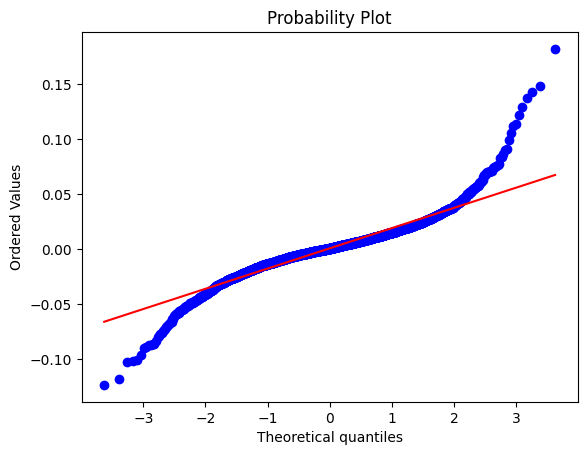

In [207]:
data['Norm'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data.dropna(inplace=True, axis=0)
stats.probplot(data['Norm'], dist="norm", plot=pylab)

In [208]:
import pandas as pd

def MACD(df, period1, period2, periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean() # Provides exponential weighted functions
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()

    MACD = EMA1-EMA2
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()

    Histogram = MACD-Signal
    return Histogram


In [209]:
import pandas as pd

def stochastics_oscillator(df, period):
    # Rolling minimum and maximum prices over a specified period
    low_prices = pd.DataFrame.rolling(df['Low'], window=period).min()
    high_prices = pd.DataFrame.rolling(df['High'], window=period).max()

    # Stochastic Oscillator formula: %K = 100 * (Current Close - Lowest Low) / (Highest High - Lowest Low)
    k_percent = 100 * (df['Close'] - low_prices) / (high_prices - low_prices)

    return k_percent


In [210]:
def ATR(df, period):
    '''
    Method A: Current High less the current Low
    '''
    # Calculate three different true range components
    df['H-L'] = abs(df['High'] - df['Low'])         # High minus Low
    df['H-PC'] = abs(df['High'] - df['Close'].shift(1))  # High minus Previous Close
    df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))   # Low minus Previous Close

    # Calculate True Range (TR) as the maximum of the three components
    TR = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)

    return TR.to_frame()


In [211]:
macd = MACD(data['Adj Close'], 12, 26, 9)
macd.name = 'MACD'
macd.tail()


4863    1.157823
4864    1.084284
4865    0.964665
4866    0.742043
4867    0.608842
Name: MACD, dtype: float64

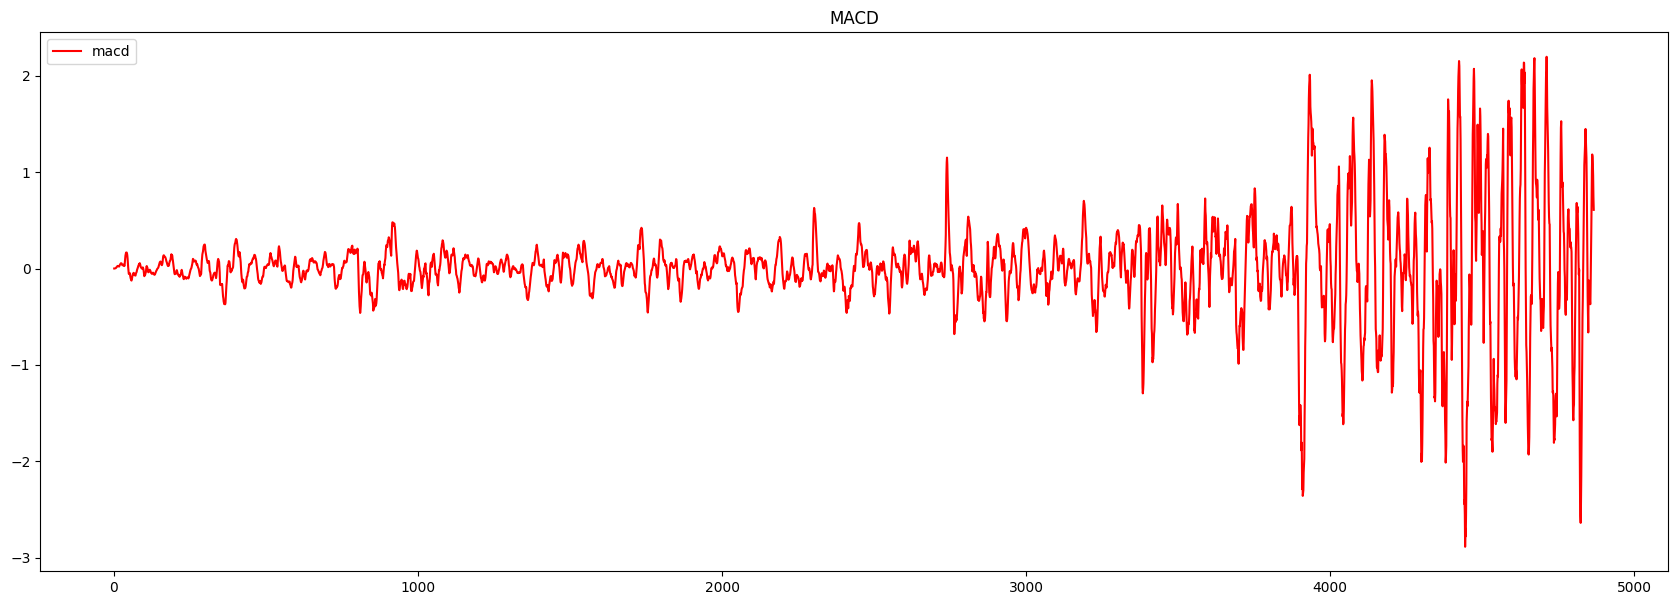

In [212]:
plt.figure(figsize=(21,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

In [213]:
stochastics = stochastics_oscillator(data, 14)
stochastics.name = 'Stochastics'
stochastics.tail()

4863    80.558766
4864    79.316985
4865    76.600603
4866    65.968130
4867    72.176919
Name: Stochastics, dtype: float64

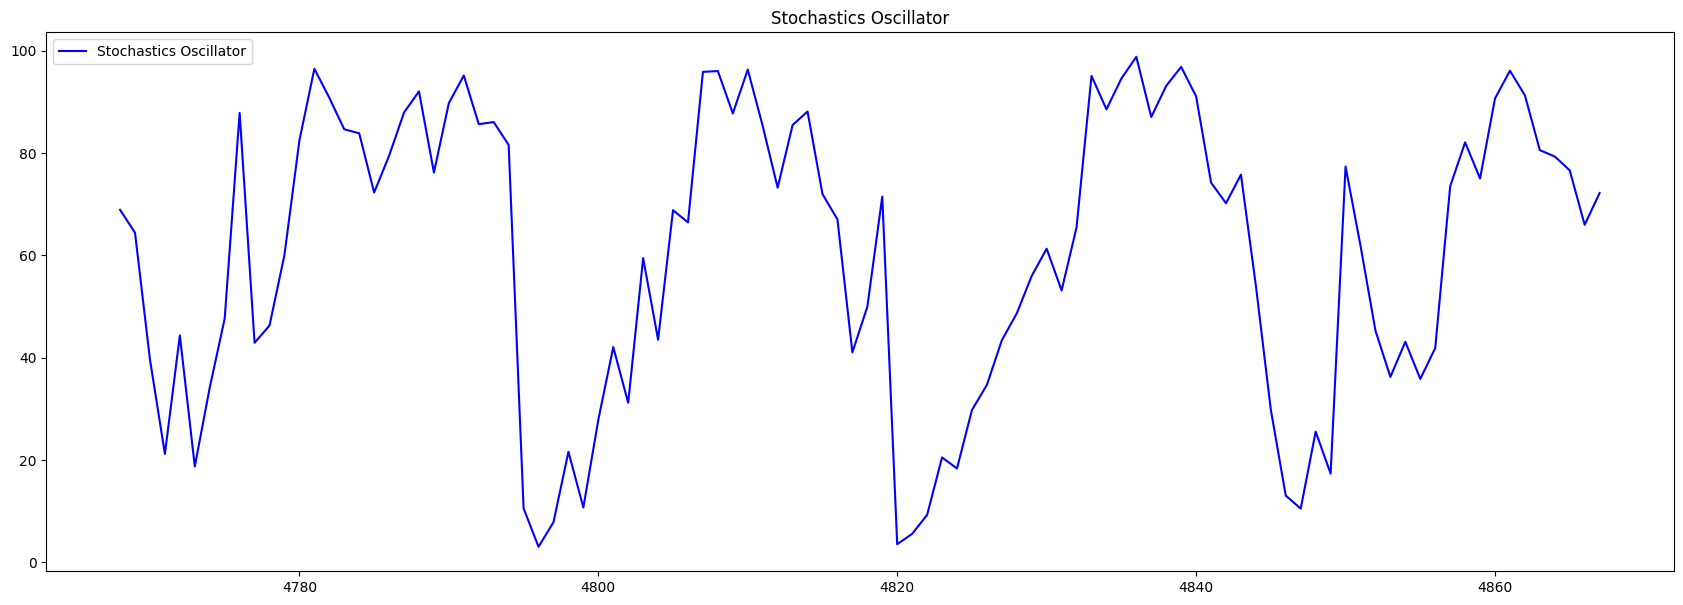

In [214]:
plt.figure(figsize=(21,7))
plt.plot(stochastics[-100:],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

In [215]:
atr = ATR(data,14)
atr.rename(columns={0:'ATR'}, inplace=True)
atr.tail()

,ATR
4863,2.269012
4864,1.442001
4865,1.535004
4866,3.189987
4867,2.660004


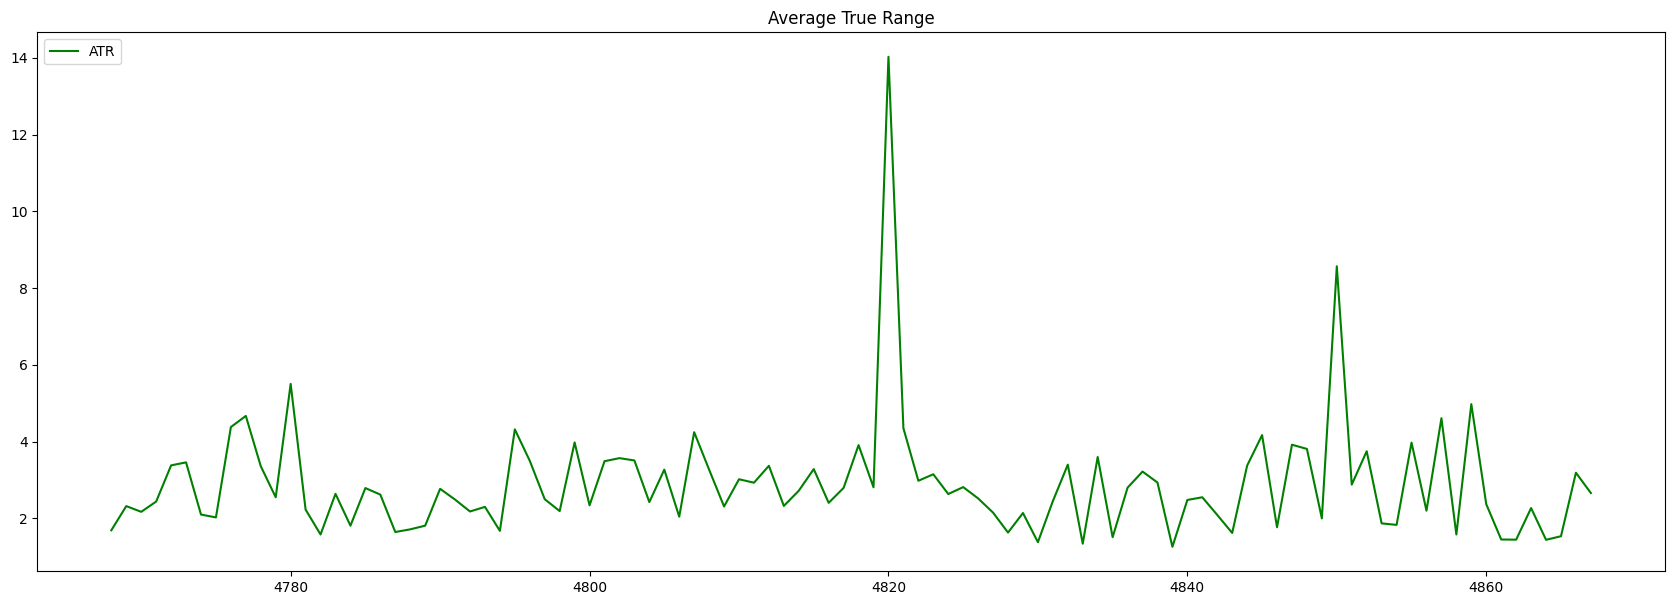

In [216]:
plt.figure(figsize=(21,7))
plt.plot(atr[-100:],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

In [217]:

data = pd.concat([data, macd, stochastics, atr], axis=1)

In [218]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm,H-L,H-PC,L-PC,MACD,Stochastics,ATR
1,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504,0.012490,0.085430,NaN,NaN,0.000000,NaN,0.085430
2,2004-09-03,2.514326,2.534002,2.473728,2.490913,2.490913,103538639,-0.014887,0.060274,0.005729,0.054545,-0.000397,NaN,0.060274
3,2004-09-07,2.515820,2.540478,2.480951,2.530017,2.530017,117506800,0.015577,0.059527,0.049565,0.009962,0.000370,NaN,0.059527
4,2004-09-08,2.509095,2.566132,2.503118,2.547950,2.547950,100186120,0.007063,0.063014,0.036115,0.026899,0.001036,NaN,0.063014
5,2004-09-09,2.553678,2.558161,2.515571,2.548199,2.548199,81620792,0.000098,0.042590,0.010211,0.032379,0.001219,NaN,0.042590


In [219]:
data.drop([ 'H-L', 'H-PC', 'L-PC'], axis=1 , inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm,MACD,Stochastics,ATR
4863,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400,-0.009710,1.157823,80.558766,2.269012
4864,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500,-0.001132,1.084284,79.316985,1.442001
4865,2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700,-0.002480,0.964665,76.600603,1.535004
4866,2024-01-02,139.600006,140.615005,137.740005,139.559998,139.559998,20071900,-0.009769,0.742043,65.968130,3.189987
4867,2024-01-03,138.600006,141.089996,138.429993,140.360001,140.360001,18963400,0.005716,0.608842,72.176919,2.660004


In [220]:
data['Y'] = data['Adj Close'].shift(-1)
data.dropna(axis=0, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm,MACD,Stochastics,ATR,Y
14,2004-09-22,2.924040,2.980578,2.909345,2.948448,2.948448,152344894,0.004572,0.025167,85.789848,0.071233,3.009221
15,2004-09-23,2.959906,3.054302,2.914575,3.009221,3.009221,171524515,0.020402,0.026374,92.235116,0.139727,2.984563
16,2004-09-24,3.012209,3.090914,2.982820,2.984563,2.984563,183336625,-0.008228,0.024519,82.564367,0.108094,2.945460
17,2004-09-27,2.977838,3.010715,2.934003,2.945460,2.945460,141994242,-0.013188,0.019854,75.254351,0.076712,3.159657
18,2004-09-28,3.021176,3.173106,2.994028,3.159657,3.159657,340190355,0.070198,0.027488,97.954640,0.227646,3.264763


In [221]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm,MACD,Stochastics,ATR,Y
14,2004-09-22,2.924040,2.980578,2.909345,2.948448,2.948448,152344894,0.004572,0.025167,85.789848,0.071233,3.009221
15,2004-09-23,2.959906,3.054302,2.914575,3.009221,3.009221,171524515,0.020402,0.026374,92.235116,0.139727,2.984563
16,2004-09-24,3.012209,3.090914,2.982820,2.984563,2.984563,183336625,-0.008228,0.024519,82.564367,0.108094,2.945460
17,2004-09-27,2.977838,3.010715,2.934003,2.945460,2.945460,141994242,-0.013188,0.019854,75.254351,0.076712,3.159657
18,2004-09-28,3.021176,3.173106,2.994028,3.159657,3.159657,340190355,0.070198,0.027488,97.954640,0.227646,3.264763


In [222]:
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Norm,MACD,Stochastics,ATR,Y
Date,,,,,,,,,,,
2004-09-22,2.924040,2.980578,2.909345,2.948448,2.948448,152344894,0.004572,0.025167,85.789848,0.071233,3.009221
2004-09-23,2.959906,3.054302,2.914575,3.009221,3.009221,171524515,0.020402,0.026374,92.235116,0.139727,2.984563
2004-09-24,3.012209,3.090914,2.982820,2.984563,2.984563,183336625,-0.008228,0.024519,82.564367,0.108094,2.945460
2004-09-27,2.977838,3.010715,2.934003,2.945460,2.945460,141994242,-0.013188,0.019854,75.254351,0.076712,3.159657
2004-09-28,3.021176,3.173106,2.994028,3.159657,3.159657,340190355,0.070198,0.027488,97.954640,0.227646,3.264763


In [223]:
data.drop([ 'Open', 'High', 'Low', 'Close'], axis=1 , inplace=True)
data.head()

,Adj Close,Volume,Norm,MACD,Stochastics,ATR,Y
Date,,,,,,,
2004-09-22,2.948448,152344894,0.004572,0.025167,85.789848,0.071233,3.009221
2004-09-23,3.009221,171524515,0.020402,0.026374,92.235116,0.139727,2.984563
2004-09-24,2.984563,183336625,-0.008228,0.024519,82.564367,0.108094,2.945460
2004-09-27,2.945460,141994242,-0.013188,0.019854,75.254351,0.076712,3.159657
2004-09-28,3.159657,340190355,0.070198,0.027488,97.954640,0.227646,3.264763


In [224]:
from collections import deque
d = deque('ghi')                 # make a new deque with three items
for elem in d:                   # iterate over the deque's elements
    print (elem.upper())

G
H
I


In [225]:
#from sklearn.model_selection import train_test_split
#subset_df = data[['ATR', 'Adj Close', 'Volume', 'Norm', 'MACD', 'Stochastics']]
#train_X, temp_X, train_labels, temp_labels = train_test_split(subset_df,data['Y'],random_state=2023,test_size=0.3)
#val_X,test_X,val_labels,test_labels = train_test_split(temp_X, temp_labels,random_state=2023,test_size=0.5)

In [226]:
from sklearn.preprocessing import RobustScaler
from collections import deque
import random
import numpy as np
def preprocess_df(data, shuffle=False):
    mapped_data = data.copy()
    SEQ_LEN = 60

    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(data)


    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in scaled_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == SEQ_LEN:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    if shuffle == True:
        return np.array(X), y
    else:
        return np.array(X), y

In [227]:
X, y= preprocess_df(data, shuffle=False)


In [228]:
# Assuming 'scaler' is your NumPy array
print(scaler[:5])  # Print the first 5 rows


[[-0.52423829  0.78747043  0.21599279  0.05035967  0.43641218 -0.41622469
  -0.52302222]
 [-0.52289404  0.95057077  1.09794696  0.05481878  0.55205152 -0.34087049
  -0.52356768]
 [-0.52343946  1.05101901 -0.49710564  0.04796546  0.37854142 -0.37567175
  -0.52443268]
 [-0.52430438  0.69945019 -0.77346319  0.03073415  0.24738698 -0.41019707
  -0.51969441]
 [-0.51956653  2.38487728  3.87219424  0.05892987  0.65466976 -0.24414549
  -0.51736935]]


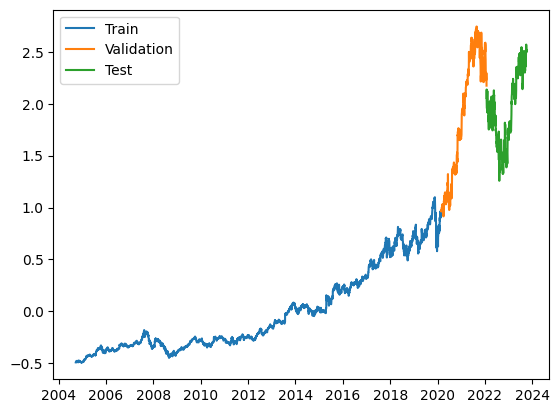

In [229]:
X, y = preprocess_df(data, shuffle=False)

# Accessing 'Date' column from the original data DataFrame
dates = data.index
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Splitting the data
X_train, y_train =  X[:q_80], y[:q_80]
X_val, y_val = X[q_80:q_90], y[q_80:q_90]
X_test, y_test = X[q_90:], y[q_90:]

# Plotting
plt.plot(dates[:q_80], y_train)
plt.plot(dates[q_80:q_90], y_val)
plt.plot(dates[q_90:q_90 + len(y_test)], y_test)  # Ensure lengths match
plt.legend(['Train', 'Validation', 'Test'])
plt.show()


In [230]:
print(len(X_test))
print(len(y_test))

427
427


In [231]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [264]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    layers.LSTM(64, input_shape=(60, 6), return_sequences=True),
    layers.LSTM(32),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.add(layers.Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01, mode='min', verbose=1, restore_best_weights=True)


model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])


Epoch 1/50
122/122 [==============================] - 10s 20ms/step - loss: 0.0813 - mean_absolute_error: 0.2338 - val_loss: 2.0445 - val_mean_absolute_error: 1.3107
Epoch 2/50
122/122 [==============================] - 2s 14ms/step - loss: 0.0640 - mean_absolute_error: 0.2075 - val_loss: 1.3885 - val_mean_absolute_error: 1.0276
Epoch 3/50
122/122 [==============================] - 2s 13ms/step - loss: 0.0624 - mean_absolute_error: 0.2017 - val_loss: 1.1944 - val_mean_absolute_error: 0.9463
Epoch 4/50
122/122 [==============================] - 2s 14ms/step - loss: 0.0625 - mean_absolute_error: 0.2040 - val_loss: 1.1520 - val_mean_absolute_error: 0.8989
Epoch 5/50
122/122 [==============================] - 2s 18ms/step - loss: 0.0620 - mean_absolute_error: 0.2017 - val_loss: 0.9671 - val_mean_absolute_error: 0.8198
Epoch 6/50
122/122 [==============================] - 2s 17ms/step - loss: 0.0630 - mean_absolute_error: 0.2057 - val_loss: 1.2047 - val_mean_absolute_error: 0.9572
Epoch 7/5

14/14 [==============================] - 1s 5ms/step


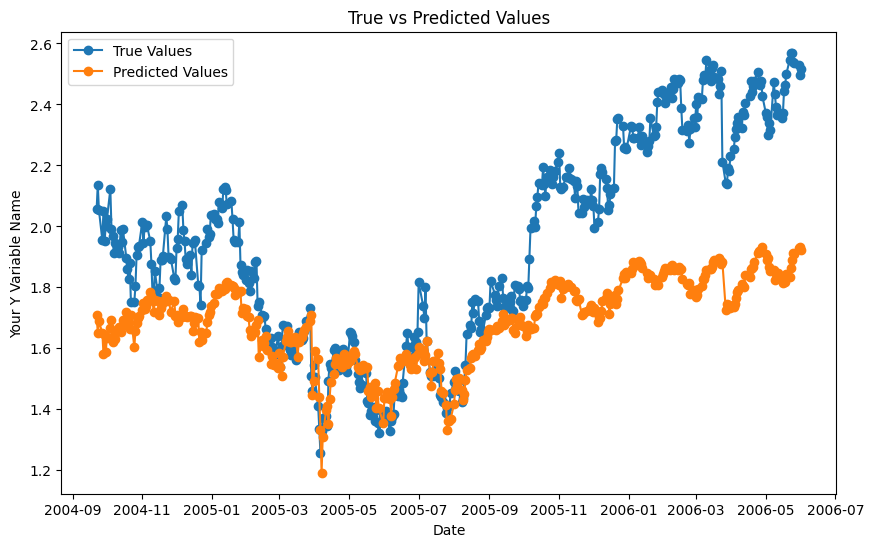

In [265]:
X_test_reshaped = X_test.reshape((X_test.shape[0], -1, X_test.shape[-1]))
test_predictions = model.predict(X_test_reshaped)

plt.figure(figsize=(10, 6))
plt.plot(dates[:len(y_test)], y_test, label='True Values', marker='o')
plt.plot(dates[:len(test_predictions)], test_predictions[:, 0], label='Predicted Values', marker='o')
plt.xlabel('Date')
plt.ylabel('Your Y Variable Name')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


In [267]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained LSTM model
model.save('my_model.keras')

# To load the model later
loaded_model = load_model('model2.h5')

In [234]:
    from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
    import tensorflow as tf
    model1 = Sequential()
    model1.add(LSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
    model1.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

    model1.add(LSTM(128, return_sequences=True))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.1))

    model1.add(LSTM(64))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.2))

    model1.add(Dense(32, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.2))

    model1.add(Dense(1, activation='tanh'))

    opt = tf.keras.optimizers.RMSprop(lr=0.5)
    model1.compile(loss='mse',optimizer=opt, metrics=['mse'])
    model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
122/122 [==============================] - 11s 26ms/step - loss: 0.2723 - mse: 0.2723 - val_loss: 4.8588 - val_mse: 4.8588
Epoch 2/10
122/122 [==============================] - 2s 16ms/step - loss: 0.1905 - mse: 0.1905 - val_loss: 1.6151 - val_mse: 1.6151
Epoch 3/10
122/122 [==============================] - 2s 16ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 1.4111 - val_mse: 1.4111
Epoch 4/10
122/122 [==============================] - 2s 19ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 1.4050 - val_mse: 1.4050
Epoch 5/10
122/122 [==============================] - 3s 24ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 1.2717 - val_mse: 1.2717
Epoch 6/10
122/122 [==============================] - 2s 19ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 1.3848 - val_mse: 1.3848
Epoch 7/10
122/122 [==============================] - 2s 16ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 1.3890 - val_mse: 1.3890
Epoch 8/10
122/122 [==============================] - 2s 16ms/step -

In [235]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
model3 = Sequential([
    layers.LSTM(64, input_shape=(60, 6), return_sequences=True),
    layers.LSTM(32),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model3.add(layers.Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model3.compile(loss='mse',
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])


Epoch 1/50
122/122 [==============================] - 9s 20ms/step - loss: 0.0851 - mean_absolute_error: 0.2394 - val_loss: 1.9308 - val_mean_absolute_error: 1.2659
Epoch 2/50
122/122 [==============================] - 2s 13ms/step - loss: 0.0635 - mean_absolute_error: 0.2062 - val_loss: 1.2375 - val_mean_absolute_error: 0.9723
Epoch 3/50
122/122 [==============================] - 2s 15ms/step - loss: 0.0629 - mean_absolute_error: 0.2041 - val_loss: 1.3141 - val_mean_absolute_error: 1.0283
Epoch 4/50
122/122 [==============================] - 2s 15ms/step - loss: 0.0620 - mean_absolute_error: 0.2008 - val_loss: 1.2654 - val_mean_absolute_error: 0.9893
Epoch 5/50
122/122 [==============================] - 2s 19ms/step - loss: 0.0612 - mean_absolute_error: 0.1984 - val_loss: 0.5938 - val_mean_absolute_error: 0.6110
Epoch 6/50
122/122 [==============================] - 2s 20ms/step - loss: 0.0601 - mean_absolute_error: 0.1933 - val_loss: 0.7021 - val_mean_absolute_error: 0.6956
Epoch 7/50

14/14 [==============================] - 2s 6ms/step


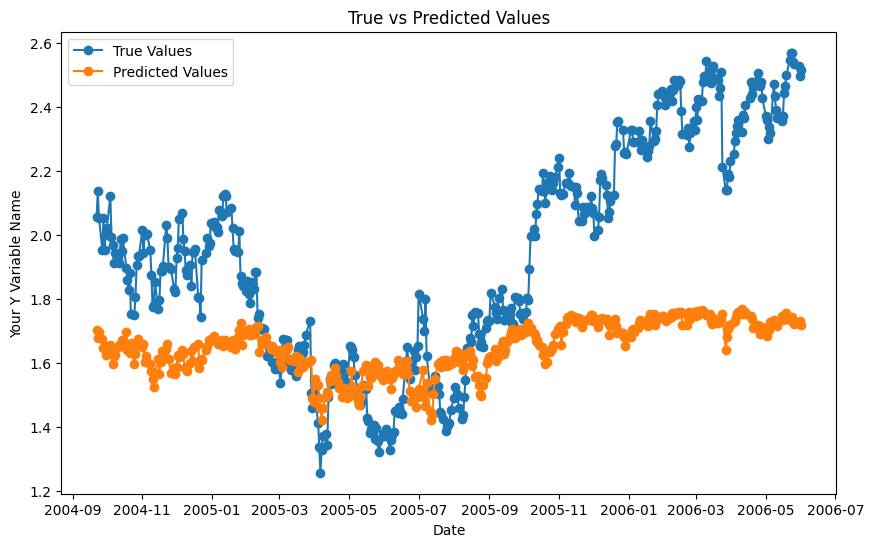

In [268]:
X_test_reshaped = X_test.reshape((X_test.shape[0], -1, X_test.shape[-1]))
test_predictions = model3.predict(X_test_reshaped)

plt.figure(figsize=(10, 6))
plt.plot(dates[:len(y_test)], y_test, label='True Values', marker='o')
plt.plot(dates[:len(test_predictions)], test_predictions[:, 0], label='Predicted Values', marker='o')
plt.xlabel('Date')
plt.ylabel('Your Y Variable Name')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

In [236]:
data1 = load_data('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [237]:
macd = MACD(data1['Adj Close'], 12, 26, 9)
macd.name = 'MACD'
macd.tail()

4863   -0.989513
4864   -1.076901
4865   -1.209472
4866   -1.787576
4867   -2.264483
Name: MACD, dtype: float64

In [238]:
stochastics = stochastics_oscillator(data1, 14)
stochastics.name = 'Stochastics'
stochastics.tail()

4863    24.150033
4864    29.191159
4865    16.881625
4866    11.125241
4867     5.064899
Name: Stochastics, dtype: float64

In [239]:
atr = ATR(data1,14)
atr.rename(columns={0:'ATR'}, inplace=True)
atr.tail()

,ATR
4863,2.410004
4864,1.510010
4865,2.669998
4866,8.639999
4867,2.450012


In [240]:
data1 = pd.concat([data, macd, stochastics, atr], axis=1)
data1.head()

,Adj Close,Volume,Norm,MACD,Stochastics,ATR,Y,MACD,Stochastics,ATR
2004-09-22 00:00:00,2.948448,152344894.0,0.004572,0.025167,85.789848,0.071233,3.009221,NaN,NaN,NaN
2004-09-23 00:00:00,3.009221,171524515.0,0.020402,0.026374,92.235116,0.139727,2.984563,NaN,NaN,NaN
2004-09-24 00:00:00,2.984563,183336625.0,-0.008228,0.024519,82.564367,0.108094,2.945460,NaN,NaN,NaN
2004-09-27 00:00:00,2.945460,141994242.0,-0.013188,0.019854,75.254351,0.076712,3.159657,NaN,NaN,NaN
2004-09-28 00:00:00,3.159657,340190355.0,0.070198,0.027488,97.954640,0.227646,3.264763,NaN,NaN,NaN
